In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://dagshub.com/Omdena/TorontoCanadaChapter_BrainScanImages.git

Cloning into 'TorontoCanadaChapter_BrainScanImages'...
remote: Enumerating objects: 454, done.
remote: Counting objects: 100% (454/454), done.
remote: Compressing objects: 100% (426/426), done.
remote: Total 454 (delta 179), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (454/454), 2.33 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [3]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import *
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import display
from keras import backend as K
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [4]:
os.chdir('/content/drive/MyDrive/ontario/Alzheimer_s Dataset')

In [5]:
os.listdir('./train')

['VeryMildDemented', 'MildDemented', 'NonDemented', 'ModerateDemented']

In [6]:
print('The Training data set:\n')

train_data = tf.keras.utils.image_dataset_from_directory(
  directory="train",
  shuffle=True,
  validation_split=0.2,
  subset="training",
  seed=100,
  image_size=(128, 128),
  batch_size=32)

print('\nThe Validation data set:\n')

val_data = tf.keras.utils.image_dataset_from_directory(
  directory="train",
  validation_split=0.2,
  subset="validation",
  seed=100,
  image_size=(128, 128),
  batch_size=32)

The Training data set:

Found 5125 files belonging to 4 classes.
Using 4100 files for training.

The Validation data set:

Found 5125 files belonging to 4 classes.
Using 1025 files for validation.


In [7]:
class_dict = {}

for index, item in enumerate(train_data.class_names):
    class_dict[index] = item

num_classes = max(class_dict.keys()) + 1

print(class_dict)

{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


In [8]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in VeryMildDemented = 1796 

Number of images in MildDemented = 717 

Number of images in NonDemented = 2560 

Number of images in ModerateDemented = 52 



In [9]:
#df.info()

TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [10]:
from keras.regularizers import l2

# L2 regularization
l2_reg = 0.0001

model = tf.keras.Sequential([

    tf.keras.layers.Rescaling(1./255),

    # First convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(l2_reg)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Dense layers for classification
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

TASK #6: COMPILE AND TRAIN DEEP LEARNING MODEL

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [12]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)




In [13]:
# Train the model with the early stopping callback
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=50,
  callbacks=[earlystopping]
)

Epoch 1/50
129/129 [==============================] - 535s 4s/step - loss: 1.0377 - accuracy: 0.4995 - val_loss: 1.0530 - val_accuracy: 0.6000
Epoch 2/50
129/129 [==============================] - 224s 2s/step - loss: 0.9235 - accuracy: 0.5720 - val_loss: 0.8727 - val_accuracy: 0.6244
Epoch 3/50
129/129 [==============================] - 234s 2s/step - loss: 0.8272 - accuracy: 0.6107 - val_loss: 0.7532 - val_accuracy: 0.6420
Epoch 4/50
129/129 [==============================] - 229s 2s/step - loss: 0.7147 - accuracy: 0.6641 - val_loss: 0.6134 - val_accuracy: 0.7249
Epoch 5/50
129/129 [==============================] - 232s 2s/step - loss: 0.5801 - accuracy: 0.7356 - val_loss: 0.4688 - val_accuracy: 0.7873
Epoch 6/50
129/129 [==============================] - 231s 2s/step - loss: 0.4254 - accuracy: 0.8102 - val_loss: 0.3986 - val_accuracy: 0.8234
Epoch 7/50
129/129 [==============================] - 228s 2s/step - loss: 0.3405 - accuracy: 0.8568 - val_loss: 0.2717 - val_accuracy: 0.8917

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       7

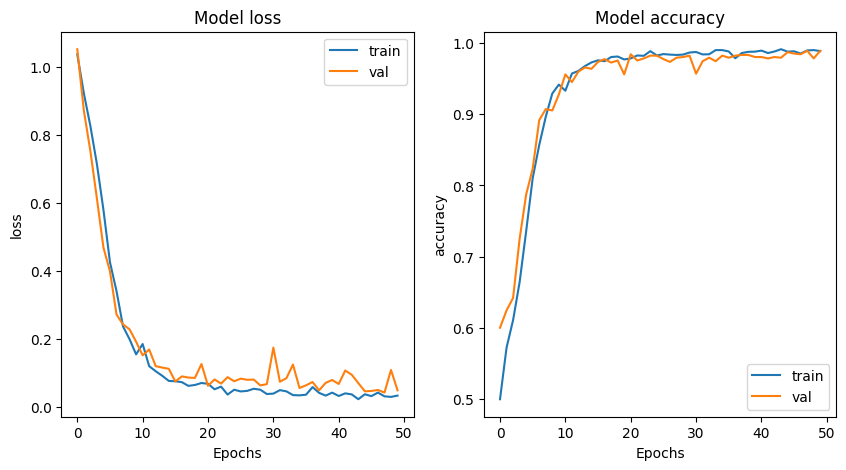

In [16]:
#Plotting the trend of the metrics during training
type(history)
history.history.items()
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.ravel()

for i, metric in enumerate(["loss", "accuracy"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])

    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [17]:
y_val = np.array([], dtype=int)
y_pred = np.array([], dtype=int)

for image, label in val_data.take(-1):
  y_val = np.concatenate((y_val, label.numpy()))
  y_pred = np.concatenate((y_pred, np.argmax(model.predict(image), axis=1)))

1/1 [==============================] - 0s 158ms/step


{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


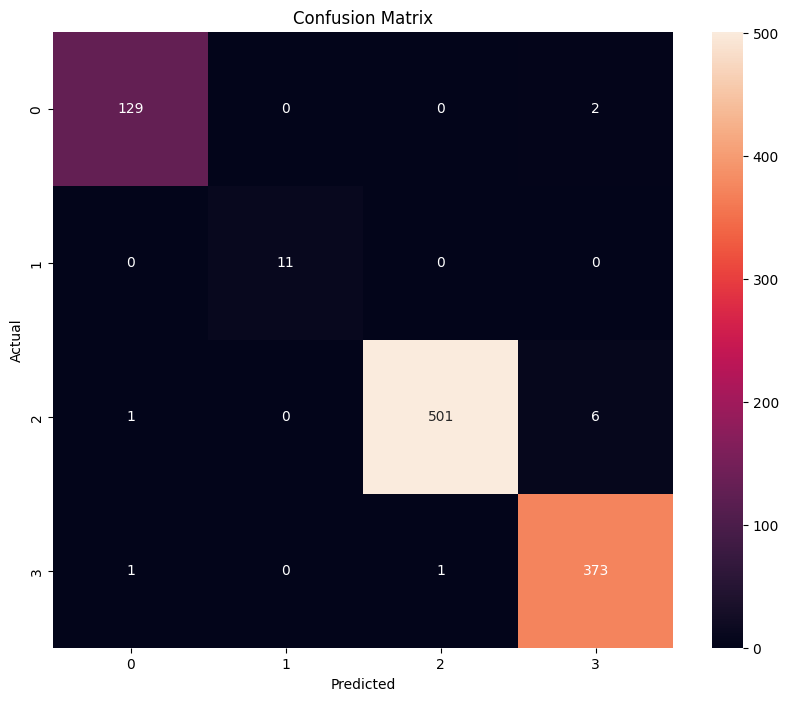

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

print(class_dict)

# Compute the confusion matrix
confusion = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print('\nThe Test data set:\n')

test_data = tf.keras.utils.image_dataset_from_directory(
  directory="test",
  image_size=(128, 128),
  batch_size=32)




The Test data set:

Found 1279 files belonging to 4 classes.


In [20]:
loss, acc = model.evaluate(test_data)
print("Accuracy", acc)

40/40 [==============================] - 184s 4s/step - loss: 2.4854 - accuracy: 0.6732
Accuracy 0.6731821894645691


In [21]:
y_test = np.array([], dtype=int)
y_pred = np.array([], dtype=int)

for image, label in test_data.take(-1):
  y_test = np.concatenate((y_test, label.numpy()))
  y_pred = np.concatenate((y_pred, np.argmax(model.predict(image), axis=1)))

1/1 [==============================] - 1s 673ms/step


{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


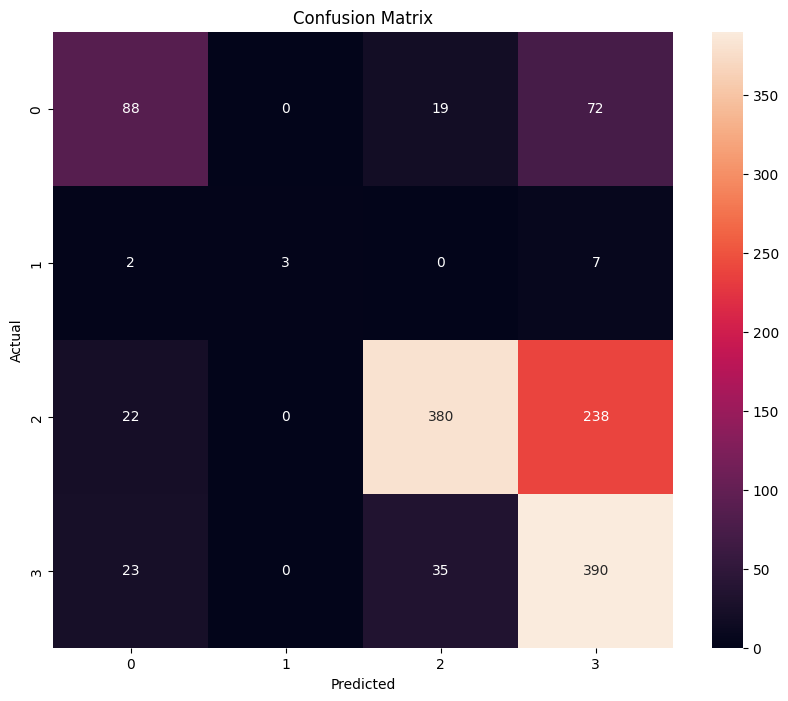

In [22]:
print(class_dict)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [24]:

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(np.asarray(y_test), np.asarray(y_pred)))


              precision    recall  f1-score   support

           0       0.65      0.49      0.56       179
           1       1.00      0.25      0.40        12
           2       0.88      0.59      0.71       640
           3       0.55      0.87      0.68       448

    accuracy                           0.67      1279
   macro avg       0.77      0.55      0.59      1279
weighted avg       0.73      0.67      0.67      1279

